# PyPlot

This file demonstrates how to create plots in Julia by using the [PyPlot](https://github.com/stevengj/PyPlot.jl) package.

PyPlot relies on the [matplotlib library](https://matplotlib.org/), which is part of Python. If you have Python installed, then it will be used as is. Otherwise, see PyPlot's homepage for instructions on how to install.

Collections of examples are available at 
[Plot Examples](https://gist.github.com/gizmaa/7214002) 
and the [Julia Plots Gallery](https://goropikari.github.io/PlotsGallery.jl/).

## Load Packages and Extra Functions

In [1]:
using Dates

using PyPlot
PyPlot.svg(false)         #prettier figures if `true`

false

# A First Plot

The next figure shows several curves.

The subsequent figure adds a title, axis labels and legends. Text and font sizes are illustrated. The axis limits and the tick marks are set manually. 

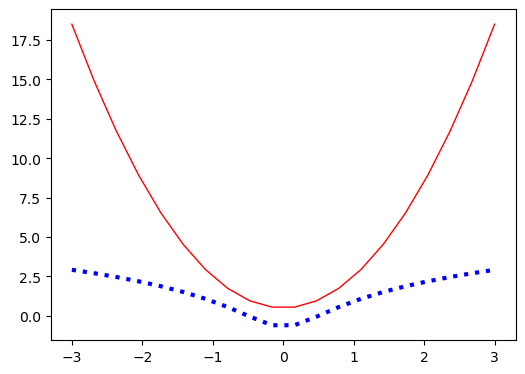

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000529DA070>

In [2]:
x = range(-3,3,length=20)
y = 2*x.^2 .+ 0.5

figure(figsize=(6,4.3))       #width and height, in inches
  plot(x,y,linestyle="-",color="r",linewidth=1.0)
  plot(x,log.(y),linestyle=":",color="b",linewidth=3.0)
#display(gcf())               #uncomment if the plot is not shown (eg. in REPL or VS Code)

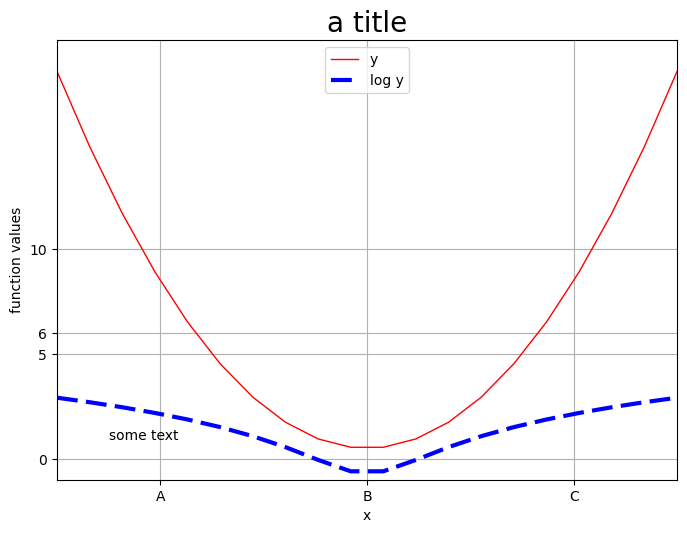

In [3]:
#now with title, labels and more - and larger

figure(figsize=(8,5.71))
  plot(x,y,linestyle="-",color="r",linewidth=1.0,label="y")
  plot(x,log.(y),linestyle=(0,(5,2)),color="b",linewidth=3.0,label="log y")
  xticks([-2;0;2],["A";"B";"C"])
  yticks([0;5;6;10])
  grid(true)
  title("a title",fontsize=20)
  xlim(-3,3)               # set limits of the x-axis
  ylim(-1,20)              # set limits of the y-axis
  xlabel("x")
  ylabel("function values")
  text(-2.5,0.9,"some text")
  legend(loc="upper center")
savefig("AFirstPlot.pdf")      #save pdf file of the plot
#display(gcf())

# Subplots

are easily constructed using the `subplot()` command. For a the first subplot in a 2x2 grid, use `subplot(2,2,1)`.

The `fig.set_size_inches(16,10.7,forward=false)` before the `savefig()` command (see below) tweaks the saving so the size of the saved graphics is not cut by your screen size.

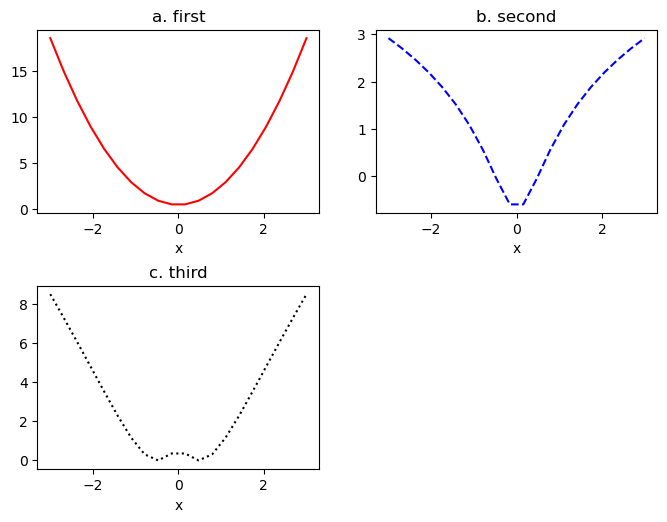

In [4]:
fig = figure(figsize=(8,5.7))                      #subplots
subplot(2,2,1)
  plot(x,y,"r-")
  title("a. first")
  xlabel("x")
subplot(2,2,2)
  plot(x,log.(y),"b--")
  title("b. second")
  xlabel("x")
subplot(2,2,3)
  plot(x,log.(y).^2,"k:")
  title("c. third")
  xlabel("x")
subplots_adjust(hspace = 0.4)                 #to give more vertical space between "row" 1 and 2

#fig.set_size_inches(16,10.7,forward=false)    #to save really large figure
#savefig("ASecondPlot.pdf")
#display(gcf())

# Adding Lines

by `hlines()`, `vlines()`, `axhline()`, `axvline()` or `axline()`.

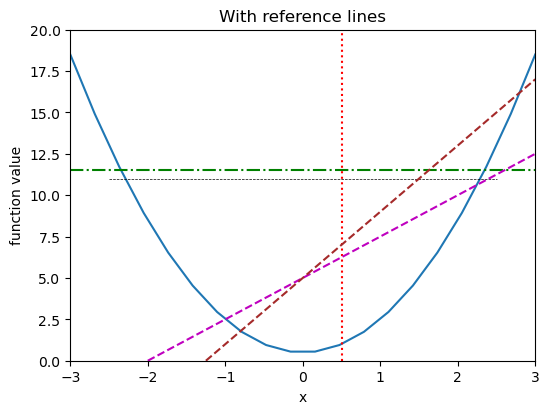

PyObject <matplotlib.lines._AxLine object at 0x00000000550BF0D0>

In [5]:
figure(figsize=(6,4.3))
  plot(x,y)
  xlim(-3,3)
  ylim(0,20)
  title("With reference lines")
  xlabel("x")
  ylabel("function value")
  hlines(11,-2.5,2.5,linestyle="--",linewidth=0.5,color="black")   #stretches over x=[-2.5;2.5]
  axhline(11.5,linestyle="-.",color="g")             #stretches over all x
  vlines(0.5,0,20,linestyle=":",color="r")
  axline((0,5),(2,10),linestyle="--",color="m")
  axline((0,5),slope=4,linestyle="--",color="brown")
#display(gcf())

# LaTeX in the Figure

PyPlot calls on LaTeXStrings so you can, for instance, use `xlabel(L"$\alpha$")` to get the x label in LaTeX. You should probably also change the general font to "cm" (see below) to make the various text elements look more similar.

To insert the value of the variable `z` into the LaTeX string ("string interpolation"), use `%$z` instead of the standard `$z`.

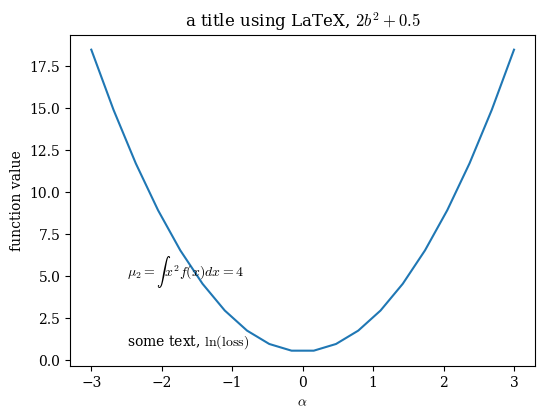

PyObject Text(-2.5, 5, '$\\mu_2 = \\int x^2 f(x) dx = 4 $')

In [6]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")  #allows you to make global changes
rcParams["mathtext.fontset"] = "cm"             #setting the math font
rcParams["font.family"]      = "serif"          #setting the text font family

z = 4                             #a value to be used inside the string

figure(figsize=(6,4.3))
  plot(x,y)
  title(L"a title using LaTeX, $2 b^2 + 0.5$")
  xlabel(L"$\alpha$")
  ylabel("function value")
  text(-2.5,0.9,L"some text, $\ln(\mathrm{loss})$")
  text(-2.5,5,L"$\mu_2 = \int x^2 f(x) dx = %$z $")        #notice: %$z
#display(gcf())

# Bars (with annotation) and Stairs

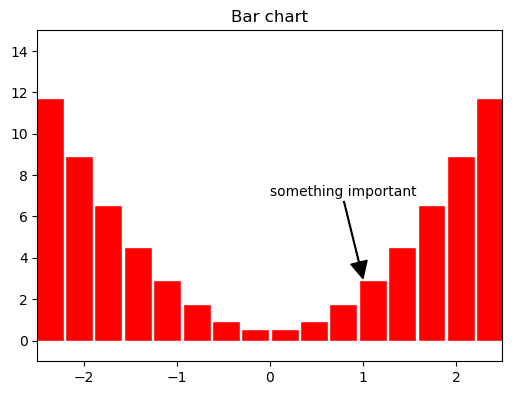

PyObject Text(0.5, 0.5, 'something important')

In [7]:
rcParams["mathtext.fontset"] = "dejavusans"            #resetting the fonts
rcParams["font.family"] = "sans-serif"
rcParams["font.size"] = 10

figure(figsize=(6,4.3))
  bar(x,y,facecolor="red",edgecolor="white",align="center",width=0.3)
  xlim(-2.5,2.5)
  ylim(-1,15)
  title("Bar chart")
  txt = "something important"
  annotate(txt,xy=[0.7;0.25],xycoords="axes fraction",xytext=[0.5;0.5],
           textcoords="axes fraction",arrowprops=Dict("facecolor"=>"black","width"=>0.5))
#display(gcf())

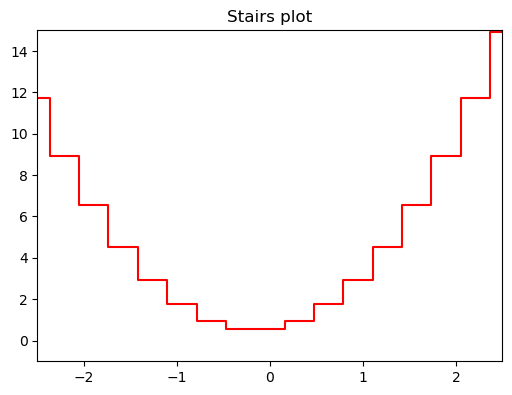

PyObject Text(0.5, 1.0, 'Stairs plot')

In [8]:
figure(figsize=(6,4.3))
  step(x,y,linewidth=1.5,color="r")
  xlim(-2.5,2.5)
  ylim(-1,15)
  title("Stairs plot")
#display(gcf())

# Surface (3D) Plots

The next plot creates a surface plot. 
Notice that if `x` is a 20 vector, `y` is a 25 vector, and `z` is 20x25, then you need to use
`surf(x,y,z')`.

In the subsequent plot, we rotate the view and also customize the axes and tick marks. This requires a slightly more involved approach (see below).

(20,)(25,)(25, 20)

the aspect ratio: [1.1428571455583785, 1.1428571455583785, 0.8571428591687839]

the elevation and azimuth: 30 -60


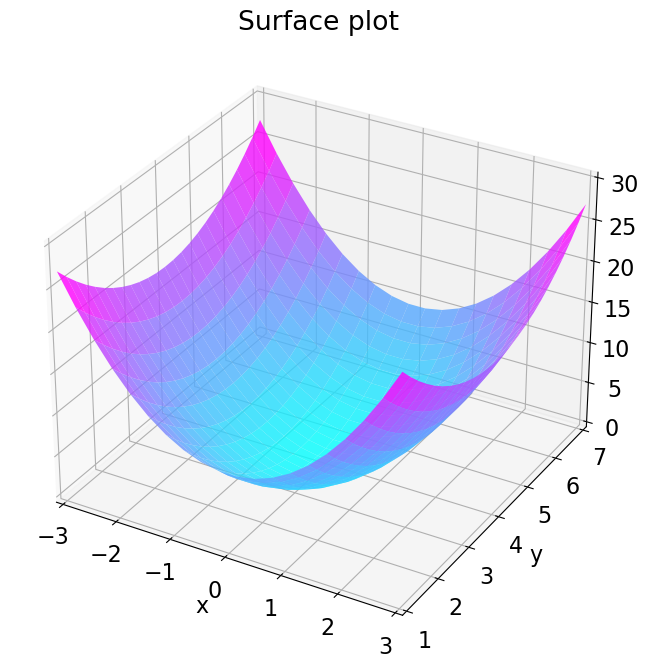

In [9]:
x = range(-3,3,length=20)       #create some "data" to plot
y = range(1,7,length=25)

z = 2*x.^2 .+ (y' .-4).^2

#notice the arguments: x,y,z'
println(size(x),size(y),size(z'))

PyPlot.matplotlib.rc("font",size=16)
fig = figure(figsize=(12,8))
ax = PyPlot.axes(projection="3d")
  surf(x,y,z',rstride=1,cstride=1,cmap=ColorMap("cool"),alpha=0.8)
  xlim(-3,3)              #change rstride and cstride to improve the look
  ylim(1,7)
  zlim(0,30)
  xlabel("x")
  ylabel("y")
  title("Surface plot")
#display(gcf())

println("\nthe aspect ratio: ",gca().get_box_aspect())
println("\nthe elevation and azimuth: ",gca().elev," ",gca().azim)

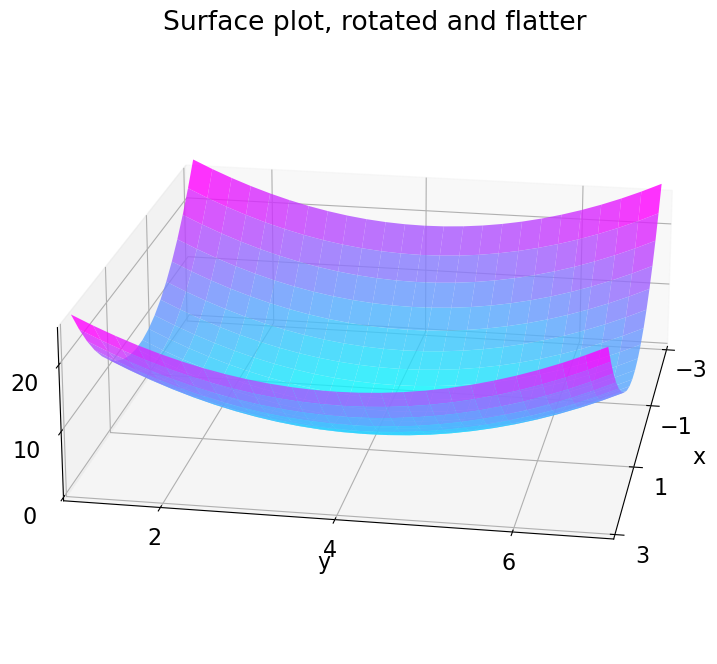

PyObject Text(0.5, 1.0, 'Surface plot, rotated and flatter')

In [10]:
using3D()             #for projection="3d" below
PyPlot.matplotlib.rc("font",size=16)
figure(figsize=(12,8))
ax = PyPlot.axes(projection="3d")       #ax = gca(projection="3d") in old matplotlib versions
  surf(x,y,z',rstride=1,cstride=1,cmap=ColorMap("cool"),alpha=0.8)
  xlim(-3,3)
  ylim(1,7)
  zlim(0,30)
  ax.view_init(elev=20.0,azim=10)               #notice: elevation and azimuth
  gca().set_box_aspect((6.0,6.0,2.0),zoom=1.2)  #matplotlib 3.3.0 is needed for this
  xticks(-3:2:3)
  yticks(2:2:6)
  zlim([0,25])
  zticks([0;10;20])
  xlabel("x")
  ylabel("y")
  title("Surface plot, rotated and flatter")
#display(gcf())

# Contour Plot

As an alternative to a surface plot, consider a contour plot. The syntax is `contour(x,y,z',...)`.

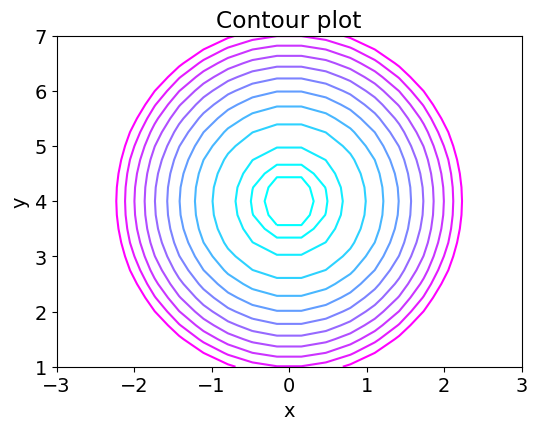

PyObject Text(0.5, 1.0, 'Contour plot')

In [11]:
PyPlot.matplotlib.rc("font",size=14)
fig1 = figure(figsize=(6,4.3))
ax = gca()
  lev = [0.25;0.5;1:1:10]
  contour(x,y,z',lev,cmap=ColorMap("cool"))
  xlim(-3,3)
  ylim(1,7)
  xlabel("x")
  ylabel("y")
  title("Contour plot")
#display(gcf())

# Scatter and Histogram


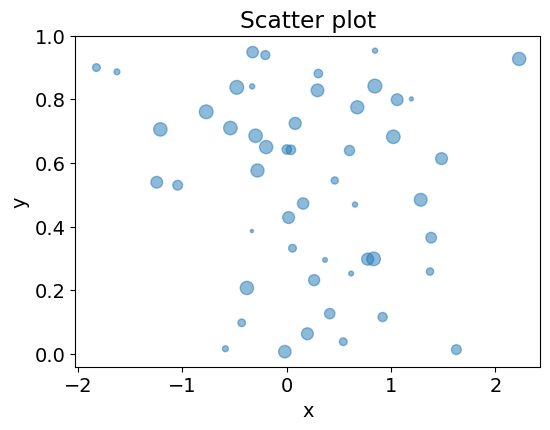

PyObject Text(29.0, 0.5, 'y')

In [12]:
N = 51
x = randn(N)                         #SCATTER, HISTOGRAM
y = rand(N)
areas = rand(51)*100                   #size of the scatter points, could be a scalar

figure(figsize=(6,4.3))
  scatter(x,y,s=areas,alpha=0.5)       #s is the size of the circles
  title("Scatter plot")
  xlabel("x")
  ylabel("y")
#display(gcf())

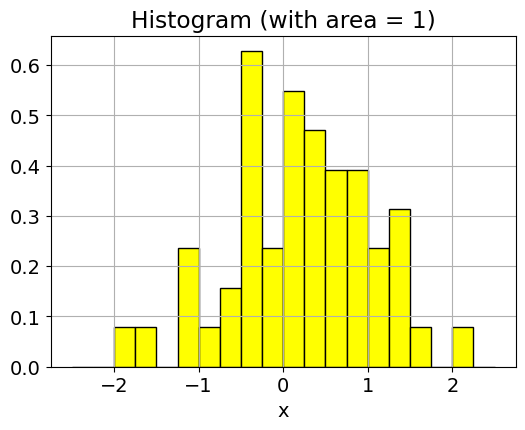

PyObject Text(0.5, 29.0, 'x')

In [13]:
figure(figsize=(6,4.3))
  Bins = -2.5:0.25:2.5
  hist(x,bins=Bins,density=true,color="yellow",edgecolor="k")
  grid(true)
  title("Histogram (with area = 1)")
  xlabel("x")
#display(gcf())

# Time Series Plots

The (time) tick marks in time series plots often need tweaking. The cell below does that by first creating a vector of dates (`xTicks`) where I want the time marks, and then calls on `xticks(xTicks)`. When the `x` variable is Julia dates, then the usual `plot()` function works well. (Otherwise, consider `plot_date()`).

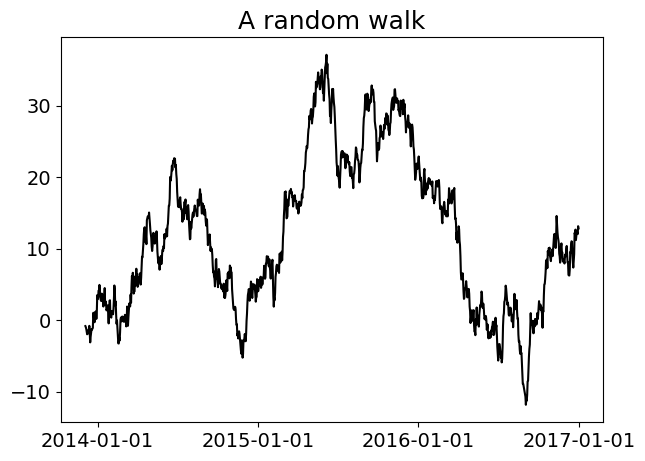

PyObject Text(0.5, 1.0, 'A random walk')

In [14]:
dN = Date(2013,12,4):Day(1):Date(2016,12,31)   #just faking some dates
y  = randn(length(dN))                               #some random numbers to plot 

xTicks = Date(2014,1,1):Year(1):Date(2017,1,1) #tick marks on x axis

figure(figsize=(7,7/1.4))          #basic time series plot
  plot(dN,cumsum(y),"k-")
  xticks(xTicks)
  title("A random walk",fontsize=18)
#display(gcf())

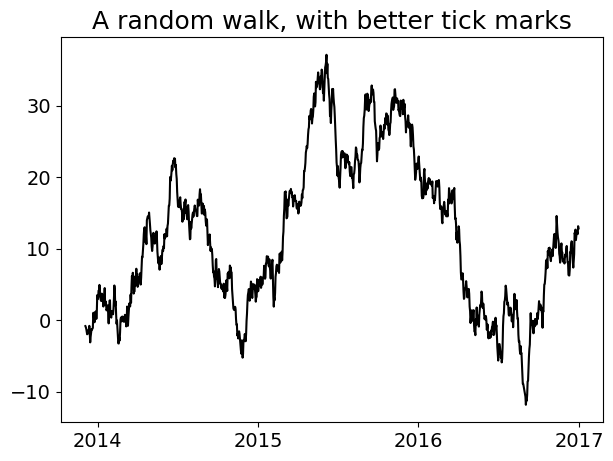

PyObject Text(0.5, 1.0, 'A random walk, with better tick marks')

In [15]:
figure(figsize=(7,7/1.4))
  plot(dN,cumsum(y),"k-")
  xticks(xTicks)
  gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
  title("A random walk, with better tick marks",fontsize=18)
#display(gcf())

# Adjusting the Resolution (extra)

In case you use PyPlot in a script (not a notebook), then you may experience that your figures do not work well with the resolution of your screen (the figures are too small/big and the elements look garbled). It sometimes help to change the resolution of your figures by adding the following to your script
```
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["figure.dpi"] = 50       #experiment with different numbers
```

Notice: this is typically not needed in a notebook.